### 데이터
* id : 샘플 아이디
* Age : 나이
* TypeofContact : 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)
* CityTier : 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급) 
* DurationOfPitch : 영업 사원이 고객에게 제공하는 프레젠테이션 기간
* Occupation : 직업
* Gender : 성별
* NumberOfPersonVisiting : 고객과 함께 여행을 계획 중인 총 인원
* NumberOfFollowups : 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수
* ProductPitched : 영업 사원이 제시한 상품
* PreferredPropertyStar : 선호 호텔 숙박업소 등급
* MaritalStatus : 결혼여부
* NumberOfTrips : 평균 연간 여행 횟수
* Passport : 여권 보유 여부 (0: 없음, 1: 있음)
* PitchSatisfactionScore : 영업 사원의 프레젠테이션 만족도
* OwnCar : 자동차 보유 여부 (0: 없음, 1: 있음)
* NumberOfChildrenVisiting : 함께 여행을 계획 중인 5세 미만의 어린이 수
* Designation : (직업의) 직급
* MonthlyIncome : 월 급여
* ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)

In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

### 데이터 확인

In [2]:
train.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        2933 non-null   int64  
 1   Age                       2801 non-null   float64
 2   TypeofContact             2918 non-null   object 
 3   CityTier                  2933 non-null   int64  
 4   DurationOfPitch           2784 non-null   float64
 5   Occupation                2933 non-null   object 
 6   Gender                    2933 non-null   object 
 7   NumberOfPersonVisiting    2933 non-null   int64  
 8   NumberOfFollowups         2901 non-null   float64
 9   ProductPitched            2933 non-null   object 
 10  PreferredPropertyStar     2917 non-null   float64
 11  MaritalStatus             2933 non-null   object 
 12  NumberOfTrips             2850 non-null   float64
 13  Passport                  2933 non-null   int64  
 14  PitchSat

In [5]:
train.columns

Index(['id', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome',
       'ProdTaken'],
      dtype='object')

In [6]:
train

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0


In [7]:
print("결측치 확인")
print("id : ",train['id'].isnull().sum())
print("Age : ",train['Age'].isnull().sum())
print("TypeofContact : ",train['TypeofContact'].isnull().sum())
print("CityTier : ",train['CityTier'].isnull().sum())
print("DurationOfPitch : ",train['DurationOfPitch'].isnull().sum())
print("Occupation : ",train['Occupation'].isnull().sum())
print("Gender : ",train['Gender'].isnull().sum())
print("NumberOfPersonVisiting : ",train['NumberOfPersonVisiting'].isnull().sum())
print("NumberOfFollowups : ",train['NumberOfFollowups'].isnull().sum())
print("ProductPitched : ",train['ProductPitched'].isnull().sum())
print("PreferredPropertyStar : ",train['PreferredPropertyStar'].isnull().sum())
print("MaritalStatus : ",train['MaritalStatus'].isnull().sum())
print("NumberOfTrips : ",train['NumberOfTrips'].isnull().sum())
print("Passport : ",train['Passport'].isnull().sum())
print("PitchSatisfactionScore : ",train['PitchSatisfactionScore'].isnull().sum())
print("OwnCar : ",train['OwnCar'].isnull().sum())
print("NumberOfChildrenVisiting : ",train['NumberOfChildrenVisiting'].isnull().sum())
print("Designation : ",train['Designation'].isnull().sum())
print("MonthlyIncome : ",train['MonthlyIncome'].isnull().sum())

결측치 확인
id :  0
Age :  94
TypeofContact :  10
CityTier :  0
DurationOfPitch :  102
Occupation :  0
Gender :  0
NumberOfPersonVisiting :  0
NumberOfFollowups :  13
ProductPitched :  0
PreferredPropertyStar :  10
MaritalStatus :  0
NumberOfTrips :  57
Passport :  0
PitchSatisfactionScore :  0
OwnCar :  0
NumberOfChildrenVisiting :  27
Designation :  0
MonthlyIncome :  100


### 데이터 전처리

### 라벨 인코딩

In [8]:
from sklearn.preprocessing import LabelEncoder
ex = LabelEncoder()
train["TypeofContact_Label"] = ex.fit_transform(train["TypeofContact"].fillna("X")) # 결측치 처리포함
train["Occupation_Label"] = ex.fit_transform(train['Occupation'])
train["Gender_Label"] = ex.fit_transform(train["Gender"])
train["ProductPitched_Label"] = ex.fit_transform(train["ProductPitched"])
train["Designation_Label"] = ex.fit_transform(train["Designation"])
train["MaritalStatus_Label"] = ex.fit_transform(train["MaritalStatus"])

### 결즉치 처리

In [9]:
train['Age_n_null'] = train["Age"].fillna(0)
train["DurationOfPitch_n_null"] = train["DurationOfPitch"].fillna(0)
train["NumberOfFollowups_n_null"] = train["NumberOfFollowups"].fillna(0)
train["PreferredPropertyStar_n_null"] = train["PreferredPropertyStar"].fillna(0)
train["NumberOfTrips_n_null"] = train["NumberOfTrips"].fillna(0)
train["NumberOfChildrenVisiting_n_null"] = train["NumberOfChildrenVisiting"].fillna(0)
train["MonthlyIncome_n_null"] = train["MonthlyIncome"].fillna(0)

### test 같이 데이터 전처리

In [10]:
test["TypeofContact_Label"] = ex.fit_transform(test["TypeofContact"].fillna("X")) # 결측치 처리포함
test["Occupation_Label"] = ex.fit_transform(test['Occupation'])
test["Gender_Label"] = ex.fit_transform(test["Gender"])
test["ProductPitched_Label"] = ex.fit_transform(test["ProductPitched"])
test["Designation_Label"] = ex.fit_transform(test["Designation"])
test["MaritalStatus_Label"] = ex.fit_transform(test["MaritalStatus"])

In [11]:
test['Age_n_null'] = test["Age"].fillna(0)
test["DurationOfPitch_n_null"] = test["DurationOfPitch"].fillna(0)
test["NumberOfFollowups_n_null"] = test["NumberOfFollowups"].fillna(0)
test["PreferredPropertyStar_n_null"] = test["PreferredPropertyStar"].fillna(0)
test["NumberOfTrips_n_null"] = test["NumberOfTrips"].fillna(0)
test["NumberOfChildrenVisiting_n_null"] = test["NumberOfChildrenVisiting"].fillna(0)
test["MonthlyIncome_n_null"] = test["MonthlyIncome"].fillna(0)

### 전처리 이전 데이터 삭제

In [12]:
sel = ["NumberOfFollowups","Age","DurationOfPitch", "PreferredPropertyStar",
        "NumberOfTrips","NumberOfChildrenVisiting","MonthlyIncome","TypeofContact",
        "Occupation","Gender","ProductPitched","Designation","MaritalStatus"]
train = train.drop(sel, axis=1)
test = test.drop(sel,axis = 1)

In [13]:
train

,id,CityTier,NumberOfPersonVisiting,Passport,PitchSatisfactionScore,OwnCar,ProdTaken,TypeofContact_Label,Occupation_Label,Gender_Label,ProductPitched_Label,Designation_Label,MaritalStatus_Label,Age_n_null,DurationOfPitch_n_null,NumberOfFollowups_n_null,PreferredPropertyStar_n_null,NumberOfTrips_n_null,NumberOfChildrenVisiting_n_null,MonthlyIncome_n_null
0,1,1,3,0,1,0,0,0,3,2,0,1,1,28.0,10.0,4.0,3.0,3.0,1.0,20384.0
1,2,3,2,1,5,1,1,1,3,1,1,2,2,34.0,0.0,4.0,4.0,1.0,0.0,19599.0
2,3,1,2,0,4,1,0,0,2,2,1,2,1,45.0,0.0,3.0,4.0,2.0,0.0,0.0
3,4,1,3,0,4,0,1,0,3,2,0,1,1,29.0,7.0,5.0,4.0,3.0,1.0,21274.0
4,5,3,2,0,3,1,0,1,2,2,1,2,0,42.0,6.0,3.0,3.0,2.0,0.0,19907.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,1,3,0,1,1,0,1,3,2,0,1,2,28.0,10.0,5.0,3.0,2.0,2.0,20723.0
1951,1952,3,3,0,5,1,0,1,2,1,4,0,0,41.0,8.0,3.0,5.0,1.0,1.0,31595.0
1952,1953,3,3,0,2,1,0,0,3,1,0,1,0,38.0,28.0,4.0,3.0,7.0,2.0,21651.0
1953,1954,3,3,0,1,1,0,1,3,1,1,2,1,28.0,30.0,5.0,3.0,3.0,2.0,22218.0


In [14]:
test

,id,CityTier,NumberOfPersonVisiting,Passport,PitchSatisfactionScore,OwnCar,TypeofContact_Label,Occupation_Label,Gender_Label,ProductPitched_Label,Designation_Label,MaritalStatus_Label,Age_n_null,DurationOfPitch_n_null,NumberOfFollowups_n_null,PreferredPropertyStar_n_null,NumberOfTrips_n_null,NumberOfChildrenVisiting_n_null,MonthlyIncome_n_null
0,1,3,2,0,2,0,0,3,2,1,2,1,32.0,0.0,5.0,3.0,1.0,1.0,19668.0
1,2,2,3,1,5,0,1,3,2,1,2,1,46.0,11.0,0.0,4.0,1.0,1.0,20021.0
2,3,3,3,0,5,1,1,3,2,1,2,1,37.0,22.0,4.0,3.0,5.0,0.0,21334.0
3,4,1,3,0,3,1,1,3,2,1,2,3,43.0,36.0,6.0,3.0,6.0,2.0,22950.0
4,5,3,4,1,4,1,1,1,1,0,1,3,25.0,7.0,4.0,4.0,3.0,3.0,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,1,2,0,4,1,1,3,1,4,0,2,54.0,6.0,3.0,3.0,7.0,1.0,32328.0
2929,2930,1,4,0,3,0,1,3,0,1,2,3,33.0,9.0,2.0,3.0,2.0,1.0,23733.0
2930,2931,1,4,0,4,1,0,2,2,1,2,0,33.0,31.0,4.0,3.0,3.0,1.0,23987.0
2931,2932,1,4,0,2,1,1,3,2,0,1,3,26.0,9.0,2.0,5.0,2.0,3.0,22102.0


In [15]:
train.describe()

,id,CityTier,NumberOfPersonVisiting,Passport,PitchSatisfactionScore,OwnCar,ProdTaken,TypeofContact_Label,Occupation_Label,Gender_Label,ProductPitched_Label,Designation_Label,MaritalStatus_Label,Age_n_null,DurationOfPitch_n_null,NumberOfFollowups_n_null,PreferredPropertyStar_n_null,NumberOfTrips_n_null,NumberOfChildrenVisiting_n_null,MonthlyIncome_n_null
count,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000
mean,978.000000,1.641432,2.922762,0.291049,3.067519,0.619437,0.195908,0.715601,2.338107,1.588747,1.172890,1.731458,1.275192,35.660870,14.714066,3.693606,3.550384,3.160614,1.196419,22415.714578
std,564.504207,0.908744,0.712276,0.454362,1.372915,0.485649,0.397000,0.462445,0.627545,0.547326,1.270394,0.954978,0.933826,12.027437,8.653313,1.045405,0.831133,1.870085,0.865161,7568.865432
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,489.500000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,30.000000,9.000000,3.000000,3.000000,2.000000,1.000000,19864.000000
50%,978.000000,1.000000,3.000000,0.000000,3.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,21931.000000
75%,1466.500000,3.000000,3.000000,1.000000,4.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,43.000000,19.000000,4.000000,4.000000,4.000000,2.000000,25401.500000
max,1955.000000,3.000000,5.000000,1.000000,5.000000,1.000000,1.000000,2.000000,3.000000,2.000000,4.000000,4.000000,3.000000,61.000000,36.000000,6.000000,5.000000,19.000000,3.000000,98678.000000


In [16]:
test.describe()

,id,CityTier,NumberOfPersonVisiting,Passport,PitchSatisfactionScore,OwnCar,TypeofContact_Label,Occupation_Label,Gender_Label,ProductPitched_Label,Designation_Label,MaritalStatus_Label,Age_n_null,DurationOfPitch_n_null,NumberOfFollowups_n_null,PreferredPropertyStar_n_null,NumberOfTrips_n_null,NumberOfChildrenVisiting_n_null,MonthlyIncome_n_null
count,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000
mean,1467.000000,1.662803,2.893283,0.290829,3.085237,0.620866,0.714286,2.335834,1.548926,1.190931,1.727583,1.270031,36.030685,14.682919,3.661439,3.569724,3.132629,1.154449,22546.094783
std,846.828495,0.921827,0.733062,0.454222,1.361211,0.485254,0.463015,0.640335,0.561446,1.279372,0.965174,0.928578,12.065437,9.184391,1.067760,0.841657,1.920966,0.861293,7070.484964
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,734.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,30.000000,8.000000,3.000000,3.000000,2.000000,1.000000,19876.000000
50%,1467.000000,1.000000,3.000000,0.000000,3.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,21984.000000
75%,2200.000000,3.000000,3.000000,1.000000,4.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,44.000000,19.000000,4.000000,4.000000,4.000000,2.000000,25433.000000
max,2933.000000,3.000000,5.000000,1.000000,5.000000,1.000000,2.000000,3.000000,2.000000,4.000000,4.000000,3.000000,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,38677.000000


In [17]:
train.shape, test.shape

((1955, 20), (2933, 19))

In [18]:
corr = train.corr()
corr

,id,CityTier,NumberOfPersonVisiting,Passport,PitchSatisfactionScore,OwnCar,ProdTaken,TypeofContact_Label,Occupation_Label,Gender_Label,ProductPitched_Label,Designation_Label,MaritalStatus_Label,Age_n_null,DurationOfPitch_n_null,NumberOfFollowups_n_null,PreferredPropertyStar_n_null,NumberOfTrips_n_null,NumberOfChildrenVisiting_n_null,MonthlyIncome_n_null
id,1.000000,-0.022072,0.036337,0.009294,-0.040459,-0.013982,-0.048933,0.027679,0.009382,0.001111,0.017948,0.012700,-0.006600,0.022279,-0.002714,0.001002,-0.004462,0.035136,0.022031,0.032371
CityTier,-0.022072,1.000000,0.018071,0.013665,-0.028168,0.014177,0.085583,-0.006532,0.159750,-0.042483,0.160561,0.141385,0.016228,0.037846,0.038109,0.021127,-0.010286,-0.014277,0.021930,0.048090
NumberOfPersonVisiting,0.036337,0.018071,1.000000,0.023638,-0.012981,0.018545,0.006483,-0.004574,0.004642,0.001182,-0.054800,-0.007937,0.032742,0.128067,0.143880,0.331093,-0.001636,0.171838,0.600986,0.253358
Passport,0.009294,0.013665,0.023638,1.000000,0.018526,-0.045133,0.293726,-0.036966,-0.006072,-0.022631,-0.022497,-0.028542,0.019800,0.012639,0.048381,0.010061,0.003838,0.011209,0.032856,0.019465
PitchSatisfactionScore,-0.040459,-0.028168,-0.012981,0.018526,1.000000,0.073097,0.067736,-0.042286,-0.032450,0.015859,-0.010217,-0.040420,-0.007714,0.020727,0.006623,-0.003051,-0.030341,0.027467,0.018558,-0.006504
OwnCar,-0.013982,0.014177,0.018545,-0.045133,0.073097,1.000000,-0.040465,0.016879,-0.025941,-0.042304,0.086790,0.043261,-0.019474,0.051140,-0.030169,0.053468,0.017098,0.002534,0.029398,0.067553
ProdTaken,-0.048933,0.085583,0.006483,0.293726,0.067736,-0.040465,1.000000,-0.047598,-0.042101,0.022398,-0.150399,-0.096041,0.169245,-0.101083,0.069795,0.102778,0.108886,0.060995,0.010089,-0.077508
TypeofContact_Label,0.027679,-0.006532,-0.004574,-0.036966,-0.042286,0.016879,-0.047598,1.000000,0.017613,-0.011438,0.013177,0.025136,-0.043840,-0.016889,-0.010612,-0.057540,0.029311,0.003137,-0.018919,-0.008920
Occupation_Label,0.009382,0.159750,0.004642,-0.006072,-0.032450,-0.025941,-0.042101,0.017613,1.000000,-0.009181,0.031275,0.000432,-0.042706,-0.007515,0.035624,-0.026113,0.027666,-0.032778,0.005813,-0.024702
Gender_Label,0.001111,-0.042483,0.001182,-0.022631,0.015859,-0.042304,0.022398,-0.011438,-0.009181,1.000000,-0.072863,-0.068448,-0.118900,-0.014434,0.002065,-0.054865,0.008447,0.012567,0.029096,-0.028601


<AxesSubplot:title={'center':'Titanic correlation'}>

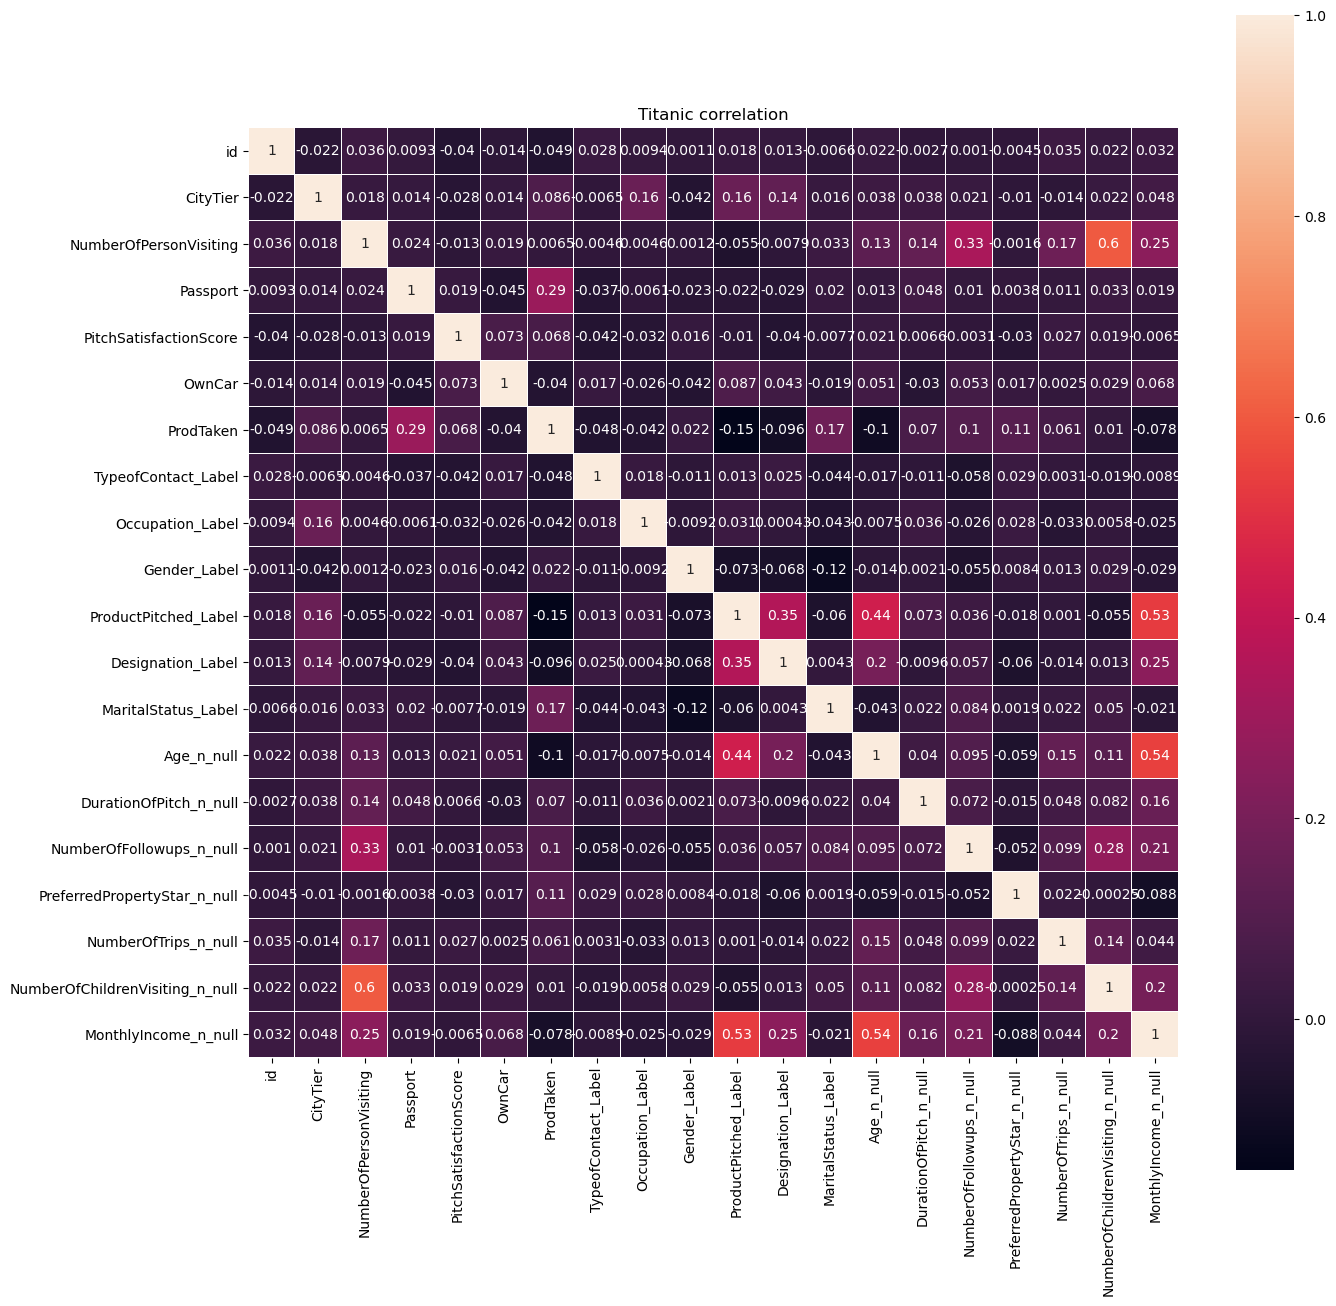

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default') # 비주얼 코드의 어두운 화면으로 사용하기 때문에 label값이 잘 보이지 않아서 사용
plt.figure(figsize=(15,15))
plt.title("Titanic correlation")
sns.heatmap(corr,linewidths=0.1,square=True,annot=True)

### ProdTaken 상관관계

In [20]:
corr["ProdTaken"]

id                                -0.048933
CityTier                           0.085583
NumberOfPersonVisiting             0.006483
Passport                           0.293726
PitchSatisfactionScore             0.067736
OwnCar                            -0.040465
ProdTaken                          1.000000
TypeofContact_Label               -0.047598
Occupation_Label                  -0.042101
Gender_Label                       0.022398
ProductPitched_Label              -0.150399
Designation_Label                 -0.096041
MaritalStatus_Label                0.169245
Age_n_null                        -0.101083
DurationOfPitch_n_null             0.069795
NumberOfFollowups_n_null           0.102778
PreferredPropertyStar_n_null       0.108886
NumberOfTrips_n_null               0.060995
NumberOfChildrenVisiting_n_null    0.010089
MonthlyIncome_n_null              -0.077508
Name: ProdTaken, dtype: float64

### 데이터 나누기

In [21]:
from sklearn.model_selection import train_test_split
sel = ["TypeofContact_Label","CityTier","Passport","ProductPitched_Label","PreferredPropertyStar_n_null","Designation_Label",
        "Age_n_null","NumberOfFollowups_n_null","MaritalStatus_Label"]
X = train[sel]
y = train['ProdTaken']

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state= 0)

In [22]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1466, 9), (1466,), (489, 9), (489,))

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)

print((pred==y_test).sum()/len(pred))

0.8486707566462167


In [24]:
pred_test = model.predict(test[sel])

In [25]:
preds = pd.DataFrame(pred_test)
pred_final = np.array(preds)
pred_final

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

In [26]:
submission = pd.read_csv("../data/sample_submission.csv")

In [27]:
submission['ProdTaken'] = pred_final

In [28]:
submission

,id,ProdTaken
0,1,0
1,2,1
2,3,0
3,4,0
4,5,1
...,...,...
2928,2929,0
2929,2930,0
2930,2931,0
2931,2932,1


In [29]:
submission.to_csv("submission1.csv",index=False)